In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
#preprocessing data

# rename columns
df = pd.read_csv("./data/data.csv", skiprows=[0], header=None)
df.columns=['order', 'major', 'minor', 'post_grad', 'why_research', 'past_experience', 'motivations', 'in_lab', 'interests', 'one_word', 'color', 'time', 'mission', 'spy', 'group', 'spot']

# replace program acceptance into bool
df['group'] = df['group'].fillna("No")
df['group'] = df['group'].replace('Y', "Yes")

df['spot'] = df['spot'].fillna("No")
df['spot'] = df['spot'].replace('Y', "Yes")

# replace na values
df['minor'] = df['minor'].fillna("None")


In [62]:
# preprocess data for spy, time, and mission question

def process_data(x):
    temp = (str(x).replace("\n", " ").replace("-","")).split(" ")
    filtered = [value for value in temp if any(char.isalpha() for char in value)]
    return len(filtered)


# preprocess response data for spy question
df['spy_len'] = df['spy'].apply(lambda x: process_data(x))
spy_graph = df[['spy_len', 'spot']]

# length of response for time question 
df['time_len'] = df['time'].apply(lambda x: process_data(x))
time_graph = df[['time_len', 'spot']]

# length of response for top secret mission
df['mission_len'] = df['mission'].apply(lambda x: process_data(x))
mission_graph = df[['mission_len', 'spot']]


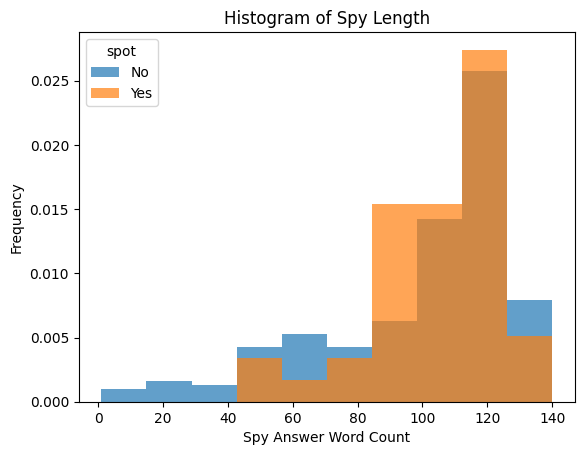

In [75]:
# Spy Graph
spy_graph.pivot(columns='spot', values='spy_len').plot.hist(density=True, alpha=0.7)
plt.xlabel('Spy Answer Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Spy Length')
plt.show()

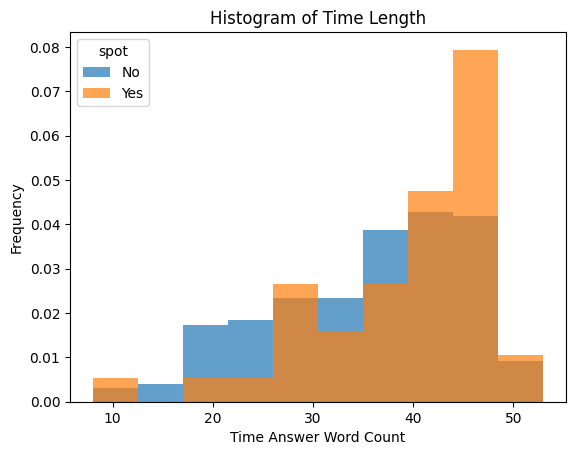

In [77]:
# Spy Graph
time_graph.pivot(columns='spot', values='time_len').plot.hist(density=True, alpha=0.7)
plt.xlabel('Time Answer Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Time Length')
plt.show()

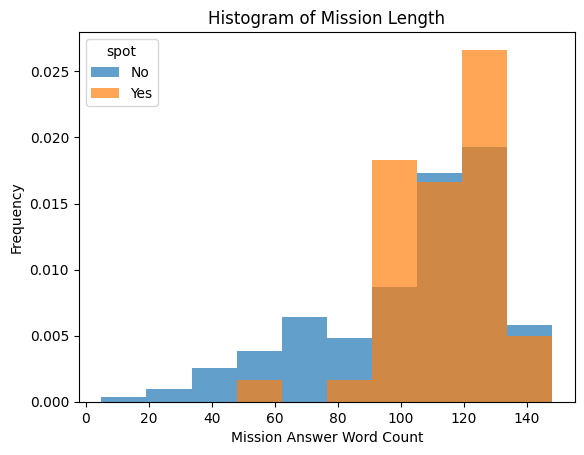

In [76]:
mission_graph.pivot(columns='spot', values='mission_len').plot.hist(density=True, alpha=0.7)
plt.xlabel('Mission Answer Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Mission Length')
plt.show()